In [1]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
#from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
#import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pickle
#import pydotplus
#from IPython.display import Image
#from sklearn.metrics import roc_curve
import collections
#from sklearn.metrics import auc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from tabulate import tabulate
from scipy.spatial import distance
#from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.tree import _tree


#pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

/Users/hswamy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('gmc333.csv')

In [3]:
dataset.insert(0, 'New_ID', range(110, 110 + len(dataset)))

In [4]:
dataset['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [5]:
dataset.describe()

,New_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,MIz_DRnz,MIz_DRz,MInz_DRz,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000
mean,75109.500000,0.066840,0.032861,52.240235,0.246108,0.450257,6.546643e+03,8.452760,0.090770,1.017887,0.065138,0.737203,0.005287,0.005607,0.36898,3673.196399,5.355418,7.434873,0.625413,0.066340,3344.059320,4.346746,5.533231,0.721211,2.318162e-02,0.402016,0.075146,0.084645
std,43301.414527,0.249746,0.040769,14.596631,0.697193,0.428171,1.290915e+04,5.145951,0.485149,1.121458,0.329861,1.105450,0.072517,0.074668,0.48253,3493.021586,4.163352,4.767351,0.484018,0.248876,6826.493939,3.343260,4.444556,0.923145,2.296146e-01,1.101384,0.286541,0.321902
min,110.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.570000e-07,0.000000,0.000000,0.000000
25%,37609.750000,0.000000,0.002987,41.000000,0.000000,0.000000,3.734000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,2.250000,0.000000,1.666390e-04,0.000000,0.000000,0.000000
50%,75109.500000,0.000000,0.015418,52.000000,0.000000,0.366508,5.524000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2989.970967,8.003019,7.000000,1.000000,0.000000,2980.790304,3.500000,4.000000,0.500000,2.590465e-04,0.000000,0.000000,0.000000
75%,112609.250000,0.000000,0.055905,63.000000,0.000000,1.000000,7.869294e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.00000,8158.000000,9.006754,10.000000,1.000000,0.000000,5100.000000,5.666667,8.000000,1.000000,4.543390e-04,0.000000,0.000000,0.000000
max,150109.000000,1.000000,0.999000,91.000000,13.000000,1.000000,3.008750e+06,58.000000,17.000000,32.000000,11.000000,10.000000,1.000000,1.000000,1.00000,8158.000000,9.006754,57.000000,1.000000,1.000000,988311.117300,57.000000,57.000000,32.000000,1.100000e+01,19.000000,11.000000,11.000000


In [6]:
# split data into train test and vaidate-----

train, test = train_test_split(dataset, test_size=0.3)
test, val = train_test_split(test, test_size=0.065)

In [7]:
frames = [train, test]
Final_dataset = pd.concat(frames)
print(Final_dataset.shape)
print(val.shape)

(147075, 28)
(2925, 28)


In [8]:
# splitting the dataset into Independent and Dependent Variable

X_train = train.drop(['New_ID','SeriousDlqin2yrs'], axis=1)
Y_train = train['SeriousDlqin2yrs']
X_test = test.drop(['New_ID','SeriousDlqin2yrs'], axis=1)
Y_test = test['SeriousDlqin2yrs']
X_val = val.drop(['New_ID','SeriousDlqin2yrs'], axis=1)
Y_val = val['SeriousDlqin2yrs']

# Train The Random Forest Classifier

In [9]:
X_total = dataset.drop(['New_ID','SeriousDlqin2yrs'], axis=1)
Y_total = dataset['SeriousDlqin2yrs']

In [10]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

model.fit(X_total, Y_total)
Y_prob_total = model.predict_proba(X_total)

dtype = [('Col1','int32'), ('Col2','float32')]
values = Y_prob_total
index = ['Row'+str(i) for i in range(1, len(values)+1)]

prob_df1 = pd.DataFrame(values, index=index)
prob_df1.reset_index(inplace=True,drop = True)

dataset['Global_prob_nondefault']=prob_df1[0]
dataset['Global_prob_default']=prob_df1[1]


In [11]:
dataset.head(2)

,New_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,MIz_DRnz,MIz_DRz,MInz_DRz,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine,Global_prob_nondefault,Global_prob_default
0,110,0,0.095715,40.0,0.0,0.0,2600.0,4,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,4.0,0,0,2600.0,4.0,2.0,0.0,0.000769,0.0,0.0,0.0,0.98,0.02
1,111,0,0.065818,38.0,1.0,0.0,3042.0,2,1.0,0.0,0.0,0.0,0,0,1,0.0,0.0,2.0,0,0,3042.0,2.0,2.0,0.0,0.000329,2.0,1.0,1.0,0.90,0.10


In [12]:
train, test = train_test_split(dataset, test_size=0.3)
test, val = train_test_split(test, test_size=0.0002)
print(train.shape)
print(test.shape)
print(val.shape)

frames = [train, test]
Final_dataset = pd.concat(frames)
print(Final_dataset.shape)

(105000, 30)
(44991, 30)
(9, 30)
(149991, 30)


In [13]:
Final_dataset.head(2)

,New_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,MIz_DRnz,MIz_DRz,MInz_DRz,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine,Global_prob_nondefault,Global_prob_default
21438,21548,0,0.00081,88.0,0.0,0.0,5491.41611,3,0.0,0.0,0.0,0.0,0,0,1,0.0,0.000000,3.0,0,0,5491.41611,3.0,3.0,0.0,0.000182,0.0,0.0,0.0,1.0,0.0
22194,22304,0,0.10000,54.0,0.0,1.0,4982.79181,1,0.0,1.0,0.0,0.0,0,0,0,8158.0,9.006754,0.0,1,0,0.00000,0.0,0.0,1.0,0.000201,0.0,0.0,0.0,1.0,0.0


In [14]:
def Find_Similar_Bikes(df_sample1,df_sample2,in_col_names,out_col_names,n):
    
    df_sample11 = df_sample1[in_col_names].copy()
    df_sample21 = df_sample2[in_col_names].copy()
    tuples1 = [tuple(x) for x in df_sample11.values]
    tuples2 = [tuple(y) for y in df_sample21.values]
    list1 = []
    cols = out_col_names
    result_df = pd.DataFrame()
    for tup1,row1 in zip(tuples1,df_sample1.iterrows()):
        for tup2,row2 in zip(tuples2,df_sample2.iterrows()):
            list1.append([row1[1][0],row2[1][0],float("{0:.2f}".format(distance.euclidean(tup1,tup2)))])
    result_df = result_df.append(pd.DataFrame(list1, columns=cols),ignore_index=True)
    return result_df.sort_values([cols[0],cols[2]],ascending=True).groupby(cols[0]).head(n).reset_index(drop=True)
        


In [15]:
in_col_names = ['RevolvingUtilizationOfUnsecuredLines',
'age', 'NumberOfTime3059DaysPastDueNotWorse', 'DebtRatio',
'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
'NumberOfTime6089DaysPastDueNotWorse', 'NumberOfDependents', 'MIz_DRnz',
'MIz_DRz', 'MInz_DRz', 'DR_MI', 'Log_DR_MI', 'RevolvingLines',
'HasRealEstateLoans', 'HasMultipleRealEstateLoans ', 'DisposableIncome',
'RevolvingToRealEstate', 'RevolvingLinesPerPerson',
'RealEstateLoanPerPerson', 'IncomePerDependent', 'NumberOfTimePastDue',
'DelinquenciesPerLine', 'DelinquenciesPerRevolvingLine']
out_col_names = ['New_ID','Similer_New_ID','Similarity_Index']
n = 100
df = Find_Similar_Bikes(val,Final_dataset,in_col_names,out_col_names,n)

df.sort_values('New_ID', inplace=True)
region_list = np.array(df['New_ID'].unique().tolist())

df_split_data = pd.merge(left=df,right=dataset, left_on='Similer_New_ID', right_on='New_ID')
df_split_data.drop(['Similarity_Index', 'New_ID_y'], axis=1, inplace=True)
df_split_data.sort_values('New_ID_x', inplace=True)

webCategoriesSl = df_split_data.iloc[:, 3:29]
webCategoriesS2 = df_split_data[['New_ID_x','Similer_New_ID','SeriousDlqin2yrs','Global_prob_nondefault','Global_prob_default']]

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(webCategoriesSl) 
standard = pd.DataFrame(scaled_values)
#standard.head(2)
result = pd.concat([webCategoriesS2, standard], axis=1)


n = 100  #chunk row size
list_df = [df_split_data[i:i+n] for i in range(0,df_split_data.shape[0],n)]


data1=list_df[0]
data2=list_df[1]
data3=list_df[2]
data4=list_df[3]
data5=list_df[4]


In [16]:
data1.head(2)

,New_ID_x,Similer_New_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,MIz_DRnz,MIz_DRz,MInz_DRz,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine,Global_prob_nondefault,Global_prob_default
0,3901.0,7453,0,0.010854,63.0,0.0,0.366508,10300.0,9,0.0,2.0,0.0,0.0,0,0,0,2989.970967,8.003019,7.0,1,0,6524.969238,2.333333,7.0,2.0,0.000097,0.0,0.000000,0.000000,1.00,0.00
72,3901.0,29480,0,0.001938,60.0,1.0,0.366508,10300.0,11,0.0,2.0,0.0,0.0,0,0,0,2989.970967,8.003019,9.0,1,0,6524.969238,3.000000,9.0,2.0,0.000097,1.0,0.090909,0.111111,0.99,0.01


# RIGDE , HUBER AND SVR TESTING

# rigde for non defaulter

In [25]:
y1 = data1['Global_prob_nondefault']
x1 = data1.drop(['Global_prob_nondefault','Global_prob_default','New_ID_x','Similer_New_ID','SeriousDlqin2yrs'], axis=1)


In [26]:
X_train2_array = x1.as_matrix()

Y_train2_array = y1.as_matrix()


In [27]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train2_array, Y_train2_array)
# probalities values from rigde..

ridge_prob = clf.predict(X_train2_array)

In [28]:
feature_weights = sorted(zip(range(X_train2_array.shape[0]),
                             clf.coef_ * X_train2_array[0]),key=lambda x: np.abs(x[1]), reverse=True)

feature_weights

[(4, 0.4050233078225979),
 (19, 0.2162732778684951),
 (1, 0.20542857695874306),
 (15, -0.1831419725414233),
 (18, 0.1634702955084875),
 (5, -0.10684978002666953),
 (21, -0.05559870399893258),
 (20, 0.04927446811283489),
 (26, -0.04872728829040871),
 (7, 0.02858188230757475),
 (0, -0.0007770886249186192),
 (22, 6.874864045511323e-12),
 (13, 4.396217230720404e-24),
 (14, 4.5964871790955044e-29),
 (3, -6.578176160211164e-32),
 (2, 0.0),
 (6, -0.0),
 (8, -0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (16, 0.0),
 (17, 0.0),
 (23, -0.0),
 (24, -0.0),
 (25, -0.0)]

In [29]:
dtype = [('rid_prob','int32')]
values = ridge_prob
index = ['Row'+str(i) for i in range(1, len(values)+1)]

prob_rg1 = pd.DataFrame(values, index=index)
prob_rg1.reset_index(inplace=True,drop = True)

data1['Ridge_non_defaulty_prob']=prob_df1[0]


/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
data1.head(2)

,New_ID_x,Similer_New_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,MIz_DRnz,MIz_DRz,MInz_DRz,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine,Global_prob_nondefault,Global_prob_default,Ridge_non_defaulty_prob
0,3901.0,7453,0,0.010854,63.0,0.0,0.366508,10300.0,9,0.0,2.0,0.0,0.0,0,0,0,2989.970967,8.003019,7.0,1,0,6524.969238,2.333333,7.0,2.0,0.000097,0.0,0.000000,0.000000,1.00,0.00,0.98
72,3901.0,29480,0,0.001938,60.0,1.0,0.366508,10300.0,11,0.0,2.0,0.0,0.0,0,0,0,2989.970967,8.003019,9.0,1,0,6524.969238,3.000000,9.0,2.0,0.000097,1.0,0.090909,0.111111,0.99,0.01,0.99


In [36]:
y1 = data1['Global_prob_default']
x1 = data1.drop(['Global_prob_nondefault','Global_prob_default','New_ID_x','Similer_New_ID','SeriousDlqin2yrs'], axis=1)

X_train2_array = x1.as_matrix()

Y_train2_array = y1.as_matrix()

from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train2_array, Y_train2_array)
# probalities values from rigde..

ridge_prob = clf.predict(X_train2_array)


In [45]:
ridge_prob.shape

(100,)

In [37]:
feature_weights = sorted(zip(range(X_train2_array.shape[0]),
                             clf.coef_ * X_train2_array[0]),key=lambda x: np.abs(x[1]), reverse=True)

feature_weights

[(4, -0.40502330779157986),
 (19, -0.21627327786849526),
 (1, -0.20542857695874317),
 (15, 0.18314197254143183),
 (18, -0.16347029553950504),
 (5, 0.1068497800266589),
 (21, 0.05559870399893252),
 (20, -0.04927446811283505),
 (26, 0.048727288290408725),
 (7, -0.028581882307572495),
 (0, 0.0007770886249186196),
 (22, -6.874864045469747e-12),
 (13, -7.732982612278634e-25),
 (14, -8.085259114386973e-30),
 (3, 1.1571066486876843e-32),
 (2, -0.0),
 (6, 0.0),
 (8, 0.0),
 (9, -0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (16, 0.0),
 (17, -0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0)]

In [43]:
dtype = [('rid_prob','int32')]
values = ridge_prob
index = ['Row'+str(i) for i in range(1, len(values)+1)]

prob_rg1 = pd.DataFrame(values, index=index)
prob_rg1.reset_index(inplace=True,drop = True)

data1['Ridge_defaulty_prob']=prob_df1[1]

/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
data1.head(2)

,New_ID_x,Similer_New_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,MIz_DRnz,MIz_DRz,MInz_DRz,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine,Global_prob_nondefault,Global_prob_default,Ridge_non_defaulty_prob,Ridge_defaulty_prob
0,3901.0,7453,0,0.010854,63.0,0.0,0.366508,10300.0,9,0.0,2.0,0.0,0.0,0,0,0,2989.970967,8.003019,7.0,1,0,6524.969238,2.333333,7.0,2.0,0.000097,0.0,0.000000,0.000000,1.00,0.00,0.98,0.02
72,3901.0,29480,0,0.001938,60.0,1.0,0.366508,10300.0,11,0.0,2.0,0.0,0.0,0,0,0,2989.970967,8.003019,9.0,1,0,6524.969238,3.000000,9.0,2.0,0.000097,1.0,0.090909,0.111111,0.99,0.01,0.99,0.01


KeyError: 'Global_prob_nondefault'

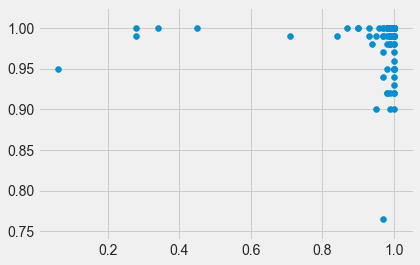

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(data1.Global_prob_nondefault, data1.Ridge_non_defaulty_prob)
# OR (with pandas 0.13 and up)
df.plot(kind='scatter', x='Global_prob_nondefault', y='Ridge_non_defaulty_prob')

KeyError: 'Global_prob_default'

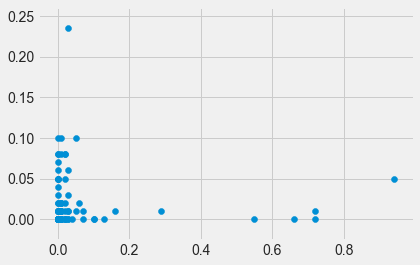

In [67]:

plt.scatter(data1.Global_prob_default, data1.Ridge_defaulty_prob)
# OR (with pandas 0.13 and up)
df.plot(kind='scatter', x='Global_prob_default', y='Ridge_defaulty_prob')

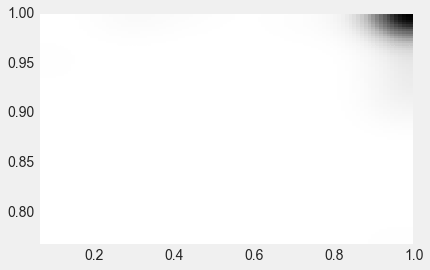

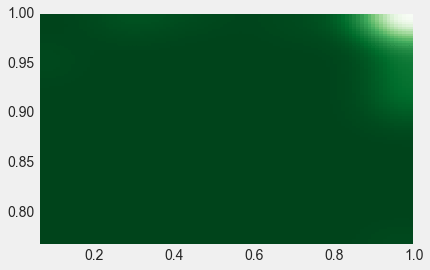

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = data1.Global_prob_nondefault
y = data1.Ridge_non_defaulty_prob
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]

zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.show()



In [66]:

data1[['New_ID_x','Similer_New_ID','SeriousDlqin2yrs','Global_prob_nondefault','Global_prob_default','Ridge_non_defaulty_prob','Ridge_defaulty_prob']]




,New_ID_x,Similer_New_ID,SeriousDlqin2yrs,Global_prob_nondefault,Global_prob_default,Ridge_non_defaulty_prob,Ridge_defaulty_prob
0,3901.0,7453,0,1.00,0.00,0.980,0.020
72,3901.0,29480,0,0.99,0.01,0.990,0.010
71,3901.0,16158,0,1.00,0.00,0.990,0.010
70,3901.0,70286,0,1.00,0.00,1.000,0.000
69,3901.0,88888,0,0.99,0.01,0.990,0.010
68,3901.0,90448,0,0.98,0.02,0.920,0.080
67,3901.0,69839,0,1.00,0.00,0.900,0.100
66,3901.0,54799,0,1.00,0.00,1.000,0.000
65,3901.0,76253,0,0.90,0.10,1.000,0.000
64,3901.0,37758,0,0.97,0.03,0.990,0.010


In [ ]:
# using the logic on test , train and validsation datasets.....

In [73]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [74]:
# probabilities for entire dataset---

Y_prob_train = model.predict_proba(X_train)
Y_prob_test = model.predict_proba(X_test)
Y_prob_val = model.predict_proba(X_val)

In [75]:
#merging all the probilities...

final_prob_y = np.vstack((Y_prob_train, Y_prob_test,Y_prob_val))

In [78]:
#  take the prob of 0

import pandas
import numpy

dtype = [('Col1','int32'), ('Col2','float32')]
values = final_prob_y
index = ['Row'+str(i) for i in range(1, len(values)+1)]

prob_df = pandas.DataFrame(values, index=index)
prob_df.reset_index(inplace=True,drop = True)

In [80]:
dataset['Global_prob_default']=prob_df[0]
dataset['Global_prob_nondefault']=prob_df[1]

In [81]:
dataset.head(2)

,New_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,MIz_DRnz,MIz_DRz,MInz_DRz,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine,Global_prob_default,Global_prob_nondefault
0,110,0,0.095715,40.0,0.0,0.0,2600.0,4,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,4.0,0,0,2600.0,4.0,2.0,0.0,0.000769,0.0,0.0,0.0,0.99,0.01
1,111,0,0.065818,38.0,1.0,0.0,3042.0,2,1.0,0.0,0.0,0.0,0,0,1,0.0,0.0,2.0,0,0,3042.0,2.0,2.0,0.0,0.000329,2.0,1.0,1.0,0.99,0.01
